# What impacts GoFord System Trip Durations?
## by Mohammed Alkhrashi

## Investigation Overview

In this Investigation I will try to look at what impacts the trip duration of bikers.

I will try to use some features from the GoFord System Data in order to do that.

## Dataset Overview

Ford GoBike is a public bicycle sharing system in the san francisco bay area, it's the first regional and large scale bicycle sharing system deployed in California. it has over 2600 biycycles in over 250 stations.

This dataset contains over 500,000+ bike trips recorded.

Some features Included in the data: Trip Duration, Age, Birth Year, Dates of trips, User Type(Subscribed or not), Gender.

In [26]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [27]:
# load in the dataset into a pandas dataframe
## Read in the data from the recent 3 months
df_clean = pd.read_csv("fordGoBike_clean")


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Trip Durations

Trip Durations recorded take a wide range of durations, from a 1 minute trip, to up to a 3 hour trip!

This was plotted on a logarithmic scale, and it takes the shape of normally distributed unimodal. Peaks around 10 minutes trip duration.

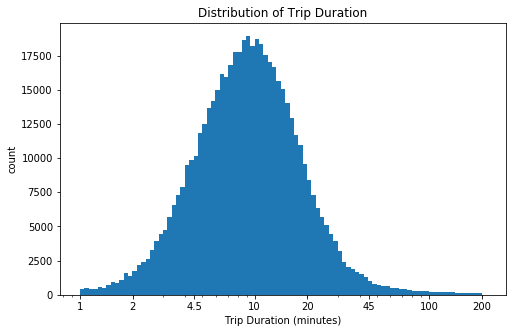

In [28]:
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df_clean['duration_sec'].max()/60)+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.title("Distribution of Trip Duration")
plt.hist(data = df_clean, x =df_clean["duration_sec"]/60, bins = bins)
plt.xscale('log')
ticks = [1,2,4.5,10,20,45,100,200] ## ~ 10^0 10^0.33 10^0.66 ... 
plt.xticks(ticks, ticks)
plt.xlabel('Trip Duration (minutes)')
plt.ylabel("count")
plt.show()

## Day of the Week impact on Trip Duration

This plot shows the mean of the trip duration in minutes for each day.

What can you notice from this graph?  

Notice that the last two days (top to bottom) on the graph are weekends.

Workweeks have less trip duration than weekends, with tuesday having the lowest average trip duration with an average of ~11 minutes, and sunday having the highest average with an average of ~15 minutes

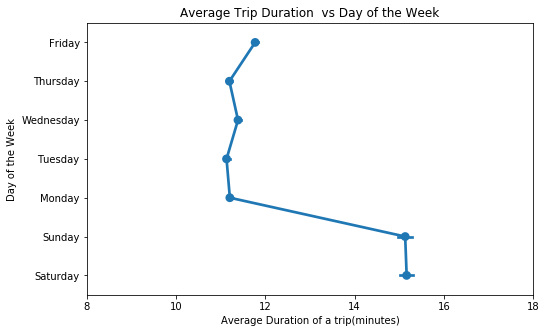

In [29]:
plt.figure(figsize=[8, 5])
plt.title("Average Trip Duration  vs Day of the Week")
sb.pointplot(data = df_clean, x = df_clean["duration_sec"]/60, y = 'day')
plt.xticks([8,10,12,14,16,18])
plt.ylabel("Day of the Week")
plt.xlabel("Average Duration of a trip(minutes)");

## User Type (Subscribed or Not) and Day of the Week Impact

We can see here a plot that plots boxplots for Subscribers and Customers(non subscribers) for each day of the week of trip durations

Notice that normal customers have longer trip durations than subscirbers on everyday of the week.

Previously we said that trip durations are on average longer on weekends, if we notice this plot carefully and notice the weekends, we can see that the customer trip duration increases in the weekends as well, but the subscribers trip duration stays roughly the same.

This tells us that the reason for increase in trip duration in weekends is due mainly to normal customers (non subscribers).

Text(0.5, 1.0, 'Trip Duration(minutes) vs User Type vs Day of the Week')

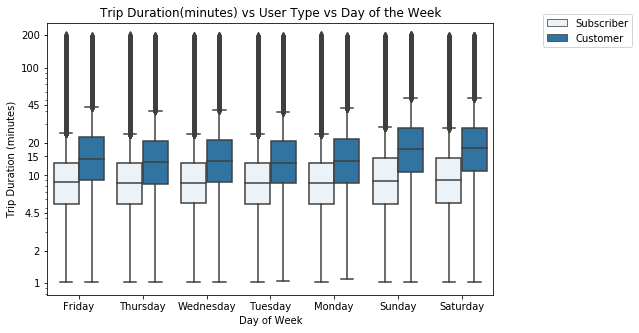

In [30]:
plt.figure(figsize=[8, 5])
default_color = sb.color_palette()[0]
ax = sb.boxplot(data=df_clean, x="day",y=df_clean["duration_sec"]/60, color = default_color,hue="user_type");
plt.yscale('log')
ticks = [1,2,4.5,10,15,20,45,100,200] ## ~ 10^0 10^0.33 10^0.66 ... 
plt.yticks(ticks, ticks)
ax.legend(bbox_to_anchor=(1.1, 1.05));
plt.xlabel("Day of Week")
plt.ylabel("Trip Duration (minutes)")
plt.title("Trip Duration(minutes) vs User Type vs Day of the Week")

## Gender and Weekday impact on Trip Duration

From the plot we can see the females have longer trip durations on average than males on everyday of the week. 

With weekends having the longest trips, as seen before.

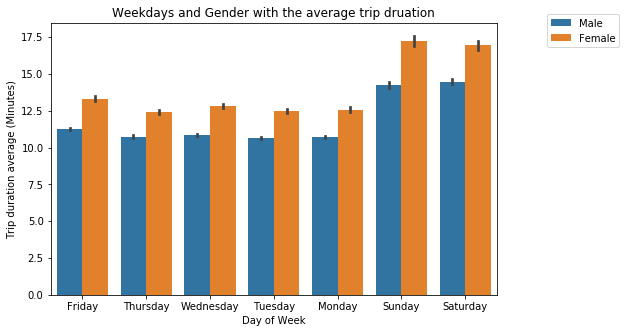

In [31]:
df_male_female = df_clean[df_clean["member_gender"]!="Other"]
plt.figure(figsize=[8, 5])
ax = sb.barplot(data = df_male_female , x = 'day', y = df_male_female ["duration_sec"]/60, hue = 'member_gender')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'member_gender')
ax.legend(bbox_to_anchor=(1.1, 1.05));
plt.xlabel("Day of Week")
plt.ylabel("Trip duration average (Minutes)")
plt.title("Weekdays and Gender with the average trip druation");

## Starting Hour of the Trip and Gender Impact on Trip duration

These two plots show each hour of the day(24) and it's assoisted Trip Duration Average, and a color indicator the gender.

One plot for subscribers, and the other for non subscribers.

If we consider the starting hour of the day to be at 6AM, then we can observe a slow rise of trip duration until we reach a peak at 2PM of trip duration in both and then trip duration start falling down.

Something interesting is that all the female points are above the male points in every starting hour, that was obeserved: that female trip durations are longer than that of males. 

Also the non subscriber graph has greater average trip duration in almost every hour, which was also shown before in a differnt plot. 

Note that data points before 6AM seems very inconsistent due to lack of rides at that time interval, which make sense as less rides are happening at 3AM since most people are sleeping or don't need to be anywhere.

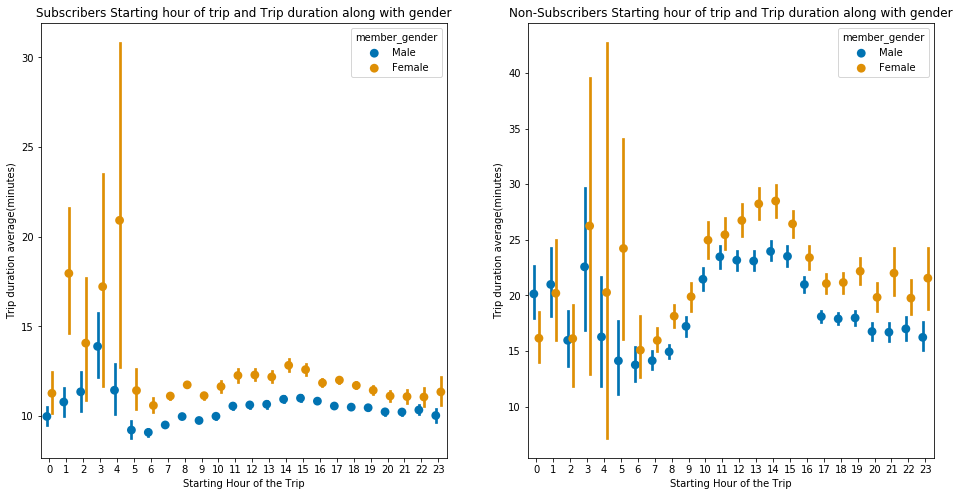

In [32]:
df_sub = df_male_female[df_male_female["user_type"]=="Subscriber"]
df_nonsub = df_male_female[df_male_female["user_type"]!="Subscriber"]
df_nonsub = df_nonsub.iloc[1:,:] ## drop first row to make the plot easier, so the first row contains a male for the color hue down
fig, ax = plt.subplots(ncols = 2, figsize = [16,8])
sb.pointplot(data = df_sub, x = 'start_hour', y = df_sub["duration_sec"]/60, hue = 'member_gender',
           palette = 'colorblind', linestyles = '', dodge = 0.3,ax=ax[0])
ax[0].set_title('Subscribers Starting hour of trip and Trip duration along with gender')
ax[0].set_xlabel('Starting Hour of the Trip')
ax[0].set_ylabel('Trip duration average(minutes)')
ax[0].set_yticklabels([],minor = True)

sb.pointplot(data = df_nonsub, x = 'start_hour', y = df_nonsub["duration_sec"]/60, hue = 'member_gender',
           palette = 'colorblind', linestyles = '', dodge = 0.3,ax=ax[1])
ax[1].set_title('Non-Subscribers Starting hour of trip and Trip duration along with gender')
ax[1].set_xlabel('Starting Hour of the Trip')
ax[1].set_ylabel('Trip duration average(minutes)')
ax[1].set_yticklabels([],minor = True)




plt.show();